In [ ]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

In [3]:
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
</style>""")

# TD_01_1 : Structures de données

## Exercice I : Notation postfixe

L'écriture des expressions arithmétiques nécessite souvent l'emploi de parenthèses. Par exemple:
$$9 + 4 * (7 + 2) * (4 + 5)$$
La notation **postfixe** ou **notation polonaise inverse** permet d'écrire de façon non ambiguë les formules arithmétiques sans utiliser de parenthèses. L'expression précédente en notation polonaise inverse devient:
$$ 9\ 4\ 7\ 2\ +\ *\ 4\ 5\ +\ *\ +$$


Dérivée de la notation polonaise utilisée pour la première fois en 1924 par le mathématicien polonais **Jan Łukasiewicz**, la NPI a été inventée par le philosophe et informaticien australien **Charles Leonard Hamblin** dans le milieu des années 1950, pour permettre les calculs sans faire référence à une quelconque adresse mémoire.

À la fin des années 1960, elle a été diffusée dans le public comme interface utilisateur avec les calculatrices de bureau de Hewlett-Packard (HP-9100), puis avec la calculatrice scientifique HP-35 en 1972. [source](https://fr.wikipedia.org/wiki/Notation_polonaise_inverse)


Une expression en NPI est évaluée de la gauche vers la droite. Dès qu'un opérateur est rencontré, il est appliqué aux deux opérandes immédiatement à sa gauche. Le résultat remplace alors l'operation dans l'expression postfixe et on pousuit l'évaluation.
Ainsi l'expression precedente devient:
$$ 9\ 4\ 7\ 2\ +\ *\ 4\ 5\ +\ *\ +$$
$$ 9\ 4\ 9\ *\ 4\ 5\ +\ *\ +$$
$$ 9\ 36\ 4\ 5\ +\ *\ +$$
$$ 9\ 36\ 9\ *\ +$$
$$ 9\ 324\ +$$
$$ 333$$
A la fin, si l'expression est valide, il ne reste qu'une valeur numérique dans l'expression qui est le résultat.


1. Comment s'écrit (3 + (4 + (5 + (6 + (7 + (8 + 9)))))) en NPI ?

9 8 7 6 5 3 4 + + + + + +

On considère l'expression en NPI suivante: <span style="border:1px solid black; padding:3px;">**3 4 5 6 7 8 9 + + + + + +**</span>. Cette expression est donnée sous forme d'une liste, les valeurs chiffrées seront de type **int** et les opérateurs rentrés comme les chaînes de caractère **"+"**.
2. Entrer dans une variable L la liste décrite précédemment.

In [4]:
# question 2
L = list(range(3, 10)) + (["+"]*6)
print(L)

[3, 4, 5, 6, 7, 8, 9, '+', '+', '+', '+', '+', '+']


3. Ecrire les fonctions **init, isEmpty, push et pop** permettant d'avoir un comportement de pile. Vous ajouterez aussi une fonction **top** permettant de lire l'élément au sommet de la pile sans la modifier.

In [5]:
# question 3
def initS():
    return []

def isEmptyS(stack):
    return stack == []

def pushS(stack, element):
    stack.append(element)
    
def popS(stack):
    return stack.pop()

def topS(stack):
    return stack[-1]

4. Ecrire une fonction **evalue** qui prend comme argument une liste comme décrit ci-dessus. Cette fonction doit:
    - initialiser une **pile** pour le calcul
    - balayer la liste de gauche à droite
    - lorsqu'on rencontre une valeur chiffrée, on l'empile
    - lorsqu'on rencontre un opérateur, on dépile deux éléments, on calcule et on empile le résultat.
    - renvoyer le résultat final

In [6]:
# question 4

# question 4
def evalue(L):
    stack = initS()
    for i in L:
        if (type(i) == int):
            pushS(stack, i)
        else:
            pushS(stack, eval(str(popS(stack)) + i + str(popS(stack))))
    return topS(stack)

print(L)
print(evalue(L))

[3, 4, 5, 6, 7, 8, 9, '+', '+', '+', '+', '+', '+']
42


## Exercice 2 : Le labyrinthe

Un labyrinthe est dit parfait si:
- il existe un chemin menant de tout point du labyrinthe à tout autre
- et si ce chemin est unique.

Nous allons construire de tels labyrinthes de manière aléatoire en utilisant une structure de pile.


Un labyrinthe sera représenté par un rectangle de largeur **l** et de hauteur **h** contenant **$l \times h$** cases carrées blanches ou noires. Une case blanche représentant un chemin et une case noire représentant un mur.


Nous travaillerons d'abord sur une matrice contenant uniquement des **1** (cases blanches) et des **0** (cases noires). puis dans un deuxième temps sur l'affichage.



1. Ecrire une fonction **init** qui prend comme arguments deux entiers **l** et **h** et qui renvoie la matrice correspondante contenant uniquement des 1.

In [7]:
# question 1
def init(l, h):
    return [[0]*l]*h

print(init(2, 3))

[[0, 0], [0, 0], [0, 0]]


In [8]:
cacher_code("exemple de solution")

In [9]:
def init2(l=51,h=51):
    return [[0 for i in range(l)] for j in range(h)]


2. Ecrire une fonction **blanchir** qui prend comme paramètre deux arguments, la carte et un couple d'entier correspondant aux coordonnées de la case à blanchir.

In [10]:
# question 2
def blanchir(matrix, coord):
    """
    Retourne une copie de la matrice orgininale avec la case aux coordonnées spécifiées blanchie
    """
    matrix[coord[0]][coord[1]] = 1

In [11]:
cacher_code("exemple de solution")

In [12]:
def blanchir2(carte, coord):
    x,y = coord
    carte[y][x] = 1

3. Ecrire une fonction **estBlanc** qui prend comme paramètre deux arguments, la carte et un couple d'entier correspondant aux coordonnées de la case testée. Cette fonction doit renvoyer un booléen. Si la case considérée est hors de la carte, elle doit renvoyer True.

In [13]:
# question 3
def estBlanc(matrix, coord):
    """
    Retourne si une case dans une matrice est blanche ou non en fonction de ses coordonnées
    True si hors de la matrice ou si indice négatif
    """
    return (coord[0] < 0 or coord[1] < 0 or # Pour éviter les soucis on considère un indice négatif comme en dehors de la matrice
        coord[0] >= len(matrix) or
        coord[1] >= len(matrix[coord[0]]) or
        matrix[coord[1]][coord[0]] != 0) # La case est bien à l'intérieur, on vérifie si elle est blanche

matrix = [
    [0, 0, 0, 1, 0],
    [1, 0, 0, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 1, 0, 0, 0]
]

print(estBlanc(matrix, (0, 2)))

False


In [14]:
cacher_code("exemple de solution")

In [15]:
def estBlanc2(carte, coord):
    x,y = coord
    if x < 0 or y < 0 or y>=len(carte) or x >=len(carte[0]):
        return True
    return carte[y][x] == 1

4. Ecrire une fonction **voisins** qui prend comme paramètre la carte courante et les coordonnées d'une case. Cette fonction doit renvoyer la liste des couples de coordonnées des cases encore noires à une distance de 2 cases de la case considérée.

In [16]:
# question 4
def voisins(matrix, coord):
    """Retourne une liste de coordonnées des cases noires dans la matrice proche de 2 des coordonnées"""
    return [c for c in 
            [(coord[0] - 2, coord[1]), (coord[0] + 2, coord[1]), (coord[0], coord[1] - 2), (coord[0], coord[1]+2)]
            if estBlanc(matrix, c)
           ]

matrix = [
    [0, 0, 0, 1, 0],
    [1, 0, 0, 1, 1],
    [0, 1, 1, 1, 1],
    [0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 1, 0, 0, 0]
]

print(voisins(matrix, (2, 2)))

[(4, 2), (2, 4)]


In [17]:
cacher_code("exemple de solution")

In [18]:
def voisins2(carte, coord):
    x,y = coord
    l = []
    if not estBlanc2(carte,(x-2,y)):
        l.append((x-2,y))
    if not estBlanc2(carte,(x+2,y)):
        l.append((x+2,y))
    if not estBlanc2(carte,(x,y-2)):
        l.append((x,y-2))
    if not estBlanc2(carte,(x,y+2)):
        l.append((x,y+2))
    return l

5. Ecrire une fonction **milieu** qui prend comme paramètre les coordonnées de deux cases séparées par une seule et qui renvoie les coordonnées de cette case.

In [19]:
# question 5
def milieu(debut, fin):
    """Prend 2 coordonnées et renvoie les coordonnées de la case au milieu"""
    return (((debut[0]+fin[0])//2, (debut[1]+fin[1])//2))

milieu((4, 2), (6, 2))

(5, 2)

In [20]:
cacher_code("exemple de solution")

In [21]:
def milieu2(coord1,coord2):
    x1, y1 = coord1
    x2, y2 = coord2
    x, y = (x1 + x2)//2, (y1 + y2)//2
    return (x, y)

6. Ecrire une fonction **choix** qui prend comme argument une liste de cases et qui en renvoie une prise au hasard. Vous pourrez utiliser la bibliothèque **random** ainsi que sa documentation accessible avec la fonction **help** afin de choisir la bonne fonction.

In [22]:
# question 6
import random

def choix(choices):
    """Retourne un element au hasard de la liste passée en argument"""
    return choices[random.randint(0, len(choices) - 1)]

print(choix([1, 2, 3]))

3


In [23]:
cacher_code("exemple de solution")

In [24]:
from random import choice
def choix2(l):
    return choice(l)


L'algorithme utilise une structure de pile:
1. On initialise une structure de pile vide
2. On initialise une matrice ne contenant que des cases noires de dimension $l \times h$
2. Les coordonnées de la case de départ (1,1) sont empilées et on blanchit cette case
3. tant que la pile est non vide
    * On fait la liste des cases accessibles à 2 cases de distance
    * Si la liste est vide
        * on dépile la case et on reprend à l'étape 4.
    * sinon
        * On en prend une case au hasard dans cette liste
        * On détermine les coordonnées de la case du milieu (entre celle tirée au hasard et la case courante)
        * On blanchit les 2 cases
        * On empile la case et on reprend à l'étape 4.
4. On tire au hasard deux cases de la forme (0,2n+1) (2n+1,0) (l-1,2n+1) ou (2n+1,h-1) pour servir d'entrée et de sortie
4. On renvoie la carte terminée


Voici ce que cela donne dans une petite animation afin de mieux comprendre
![test gif](laby.gif)

7. Implémentez cet algorithme en python dans une fonction **maze**

In [25]:
# question 7
def maze(l, h):
    stack = initS() # 1
    maze = init2(l, h) # 2
    blanchir2(maze, (1, 1)) # 3
    pushS(stack, (1, 1))
    while not isEmptyS(stack): # 4
        accessible = voisins2(maze, topS(stack))
        if accessible == []:
            popS(stack)
        else:
            caseTiree = choix(accessible)
            caseMilieu = milieu2(topS(stack), caseTiree)
            blanchir2(maze, caseTiree)
            blanchir2(maze, caseMilieu)
            pushS(stack, caseTiree)
    for i in range(2):
        blanchir2(maze,choix(choix([[(0,2*i+1),(2*i+1,0),(l-1,2*i+1),(2*i+1,h-1)] for i in range(l//2)])))
    return maze

In [26]:
cacher_code("un exemple de solution")

In [27]:
# question 7
def maze2(l,h):
    data = [] # etape 1.
    carte = init(l,h) # etape 2.
    data.append((1,1)) # etape 3.
    blanchir2(carte,(1,1)) # etape 3.
    while data != []: # etape 4.
        lv = voisins2(carte,data[-1]) # etape 4.1
        if lv == []: # condition 4.2
            data.pop() # 4.2.1
        else: # condition 4.3
            coord = choix2(lv) # 4.3.1
            coord2 = milieu2(data[-1],coord) # 4.3.2
            print(coord, coord2)
            blanchir2(carte,coord) # 4.3.3
            blanchir2(carte,coord2) # 4.3.3
            data.append(coord) # 4.3.4
    #etape 5.
    blanchir2(carte,random.choice(random.choice([[(0,2*i+1),(2*i+1,0),(l-1,2*i+1),(2*i+1,h-1)] for i in range(l//2)])))
    blanchir2(carte,random.choice(random.choice([[(0,2*i+1),(2*i+1,0),(l-1,2*i+1),(2*i+1,h-1)] for i in range(l//2)])))
    return carte # etape 6.

Voici quelques lignes de code pour tester votre fonction et afficher l'image correspondante, vous pouvez ajuster l et h mais gardez bien un nombre impair! L'affichage doit changer à chaque appel du bloc car un nouveau labyrinthe aléatoire est généré. Vous pourrez même récupérer le fichier image si vous le souhaitez.

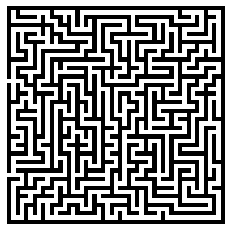

In [28]:
import matplotlib.pyplot as plt
im = plt.imshow(maze(51,51),interpolation='none')
im.set_cmap('gray')
plt.axis(False)
plt.savefig('monlabyrinthe.png')
plt.show()

## Exercice 3 : Suite de l'exercice 2 pour les plus rapides

8. Ecrire une fonction **solve** qui prend comme argument une carte de labyrinthe (comme la renvoie la fonction maze). Cette fonction devra résoudre le labirynthe et construire une image sur laquelle la solution apparait.

[(50, 43), (9, 0)]


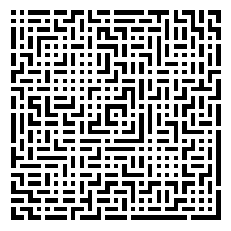

In [31]:
import time

def voisinsProches(carte, coord):
    """Récupérer les voisins à une case de celle spécifiée"""
    x,y = coord
    l = []
    if not estBlanc2(carte,(x-1,y)):
        l.append((x-1,y))
    if not estBlanc2(carte,(x+1,y)):
        l.append((x+1,y))
    if not estBlanc2(carte,(x,y-1)):
        l.append((x,y-1))
    if not estBlanc2(carte,(x,y+1)):
        l.append((x,y+1))
    return l

def valeur(carte, coord):
    x,y = coord
    carte[x][y] = 2

def solve(maze):
    """
    Trouver et affichier le chemin pour résoudre le labyrinthe
    Ne marche pas pour le moment, je n'ai pas eu le temps de finir
    """
    cotes = (
        [(0, i) for i, c in enumerate(maze[0]) if c != 0] + 
        [(len(maze) - 1, i) for i, c in enumerate(maze[len(maze) - 1]) if c != 0] +
        [(i, 0) for i, c in enumerate([e[0] for e in maze]) if c != 0] +
        [(i, 0) for i, c in enumerate([e[len(maze[0]) - 1] for e in maze]) if c != 0]
    ) # Trouver les coordonnées de l'entrée et la sortie
    entree = choix(cotes)
    valeur(maze, entree)
    print(cotes)
    
    chemin = [entree] # On stocke le chemin qu'on a pris
    
    t = time.time()
    
    while time.time() - t < 20: # Jusqu'à ce qu'on soit arrivé à la sortie (TEMP)
        if (voisinsProches(maze, entree) == 0): # Si c'est un dead-end, rebrousser chemin jusqu'à ce qu'il y ait une case avec trois chemins possibles
            chemin.pop()
            for i in chemin[::-1]:
                if (voisinsProches(maze, chemin[-1]) == 2):
                    blanchir2(maze, chemin[-1]) # Remettre à 0 puis retirer du chemin
                    chemin.pop()
                else:
                    break
        else: # Sinon choisir un chemin au hasard et le suivre
            case = choix(voisinsProches(maze, chemin[-1]))
            chemin.append(case)
            valeur(maze, case) # Mettre en valeur le chemin qu'on suit
    
    # Montrer le labyrinthe
    im = plt.imshow(maze,interpolation='none')
    im.set_cmap('gray')
    plt.axis(False)
    plt.savefig('monlabyrinthe.png')
    plt.show()
    
solve(maze(51, 51))

9. Ecrire une fonction **save** qui prend comme entrée une carte et qui construit un fichier texte contenant:
largeur espace hauteur sur la première ligne (c'est l'entête)
Des 0 et des 1 ensuite représentant les données à partir de la deuxième ligne. 
    - les 0 et les 1 devront être collés sans espace. 
    - Vous pourrez changer de ligne n'importe quand, il n'est pas obligatoire d'écrire une ligne du labyrinthe par ligne de fichier
La fonction devra sauvegarder votre fichier avec un nom raisonnable

In [50]:
def save(maze):
    string = str(len(maze)) + " " + str(len(maze[0])) + "\n"
    for x in maze:
        for y in x:
            string += str(y)
    file = open("labyrinthe.txt","w")
    file.write(string)
    file.close()
    return string
    
   
carte = [
    [0, 0, 0, 1, 0],
    [1, 0, 0, 1, 1],
    [0, 1, 1, 1, 1],
    [0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 1, 0, 0, 0]
]
save(carte)

'6 5\n000101001101111011111111101000'

10. Ecrire une fonction **read** qui prend comme entrée le nom (avec extension!) d'un fichier labyrinthe sous forme d'une chaine de caractères. Votre fonction devra lire le fichier et renvoyer une carte sous forme de matrice (opération inverse de la fonction save).

In [47]:
def read(name):
    file = open(name, "r")
    string = file.read()
    file.close()
    height = int(string.split()[0]) # Get width and height
    width = int(string.split()[1])
    content = string.split("\n")[1] # Get second line of string
    maze = [
        list(content[x*width:(x+1)*width]) for x in range(height)
    ]
    for i, x in enumerate(maze): # convert all strings to int
        maze[i] = list(map(int, maze[i]))
    return maze
    
read("labyrinthe.txt")

[[0, 0, 0, 1, 0],
 [1, 0, 0, 1, 1],
 [0, 1, 1, 1, 1],
 [0, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [0, 1, 0, 0, 0]]

11. Construire un fichier labyrinthe, échanger ces fichiers labyrinthes avec un autre élève du groupe, lire le fichier (éventuellement corriger votre fonction **read**) et résoudre le labyrinthe.